# Old town code

## Raw midi

### Import

In [372]:
import pandas
import sklearn
from sklearn import model_selection
from sklearn import linear_model

### Load data

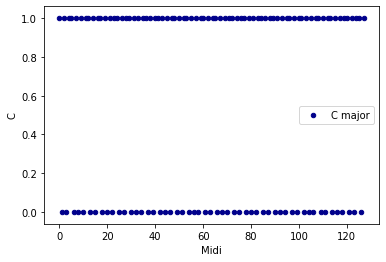

In [373]:
df = pandas.read_csv("notes.csv")
df.plot.scatter(x="Midi", y="C", label="C major", color="DarkBlue")

### Split into training and test sets

Training set size: 102
Test set size: 26


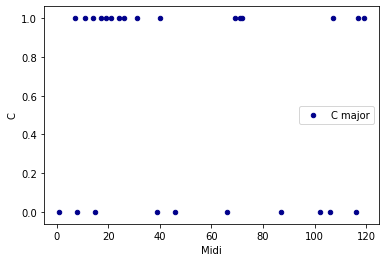

In [374]:
train, test = sklearn.model_selection.train_test_split(df, test_size=0.20, random_state=12)

print("Training set size: %i" % len(train))
print("Test set size: %i" % len(test))

test.plot.scatter(x="Midi", y="C", label="C major", color="DarkBlue")

### Linear regression

Training score: 0%
Testing score: -2%


,Midi,A,B,C,D,Relative Midi,Octave,Linear prediction (C major)
46,46,0,1,0,0,10,3,0.563825
17,17,0,0,1,0,5,1,0.543102
31,31,0,0,1,1,7,2,0.553106
8,8,1,1,0,0,8,0,0.536670
39,39,0,1,0,0,3,3,0.558822


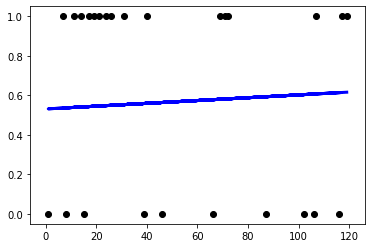

In [501]:
import matplotlib.pyplot as plt
x_train = train.filter(items=["Midi"])
y_train = train.filter(items=["C"])

linear = sklearn.linear_model.LinearRegression()
linear.fit(x_train, y_train)

x_test = test.filter(items=["Midi"])
y_test = test.filter(items=["C"])

print("Training score: %d%%" % (100 * linear.score(x_train, y_train)))
print("Testing score: %d%%" % (100 * linear.score(x_test, y_test)))

y_test_predicted = linear.predict(x_test)
plt.plot(x_test, y_test_predicted, color='blue', linewidth=3)
plt.scatter(x_test, y_test, color='black')

output = test.copy()
output["Linear prediction (C major)"] = linear.predict(x_test)
output.sample(n=5)

### Logistic regression

Training accuracy: 57%
Testing accuracy: 61%


,Midi,A,B,C,D,Relative Midi,Octave,Logistic prediction (C major)
69,69,1,0,1,1,9,5,1
39,39,0,1,0,0,3,3,1
71,71,1,1,1,1,11,5,1
24,24,0,0,1,0,0,2,1
117,117,1,0,1,1,9,9,1


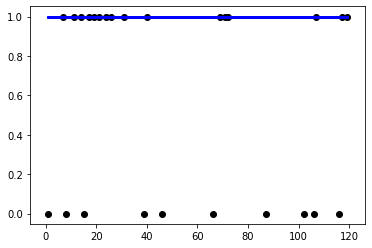

In [395]:
logistic = sklearn.linear_model.LogisticRegression(solver = 'lbfgs')
logistic.fit(x_train, y_train.values.ravel())

y_train_predicted = logistic.predict(x_train)
print("Training accuracy: %i%%" % (100 * logistic.score(x_train, y_train)))

y_test_predicted = logistic.predict(x_test)
print("Testing accuracy: %i%%" % (100 * logistic.score(x_test, y_test)))

y_test_predicted = logistic.predict(x_test)
plt.plot(x_test, y_test_predicted, color='blue', linewidth=3)
plt.scatter(x_test, y_test, color='black')

output = test.copy()
output["Logistic prediction (C major)"] = logistic.predict(x_test)
output.sample(n=5)

### Stochastic descent

In [377]:
stochastic = sklearn.linear_model.SGDClassifier()
stochastic.fit(x_train, y_train.values.ravel())

y_train_predicted = stochastic.predict(x_train)
print("Training accuracy: %i%%" % (100 * stochastic.score(x_train, y_train)))

y_test_predicted = stochastic.predict(x_test)
print("Testing accuracy: %i%%" % (100 * stochastic.score(x_test, y_test)))

output = test.copy()
output["Stochastic descent prediction (C major)"] = stochastic.predict(x_test)
output.sample(n=5)

Training accuracy: 42%
Testing accuracy: 38%


,Midi,A,B,C,D,Stochastic descent prediction (C major)
24,24,0,0,1,0,0
7,7,0,0,1,1,0
39,39,0,1,0,0,0
1,1,1,1,0,1,0
87,87,0,1,0,0,0


## Encoding octaves

### Encoding

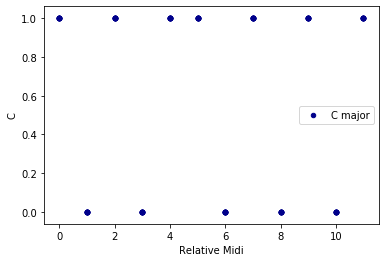

In [378]:
df["Relative Midi"] = df["Midi"] % 12
df["Octave"] = df["Midi"] // 12
df.plot.scatter(x="Relative Midi", y="C", label="C major", color="DarkBlue")
train, test = sklearn.model_selection.train_test_split(df, test_size=0.20, random_state=12)

### Linear regression

Training score: 0%
Testing score: -4%


,Midi,A,B,C,D,Relative Midi,Octave,Linear prediction (C major)
107,107,1,1,1,1,11,8,0.553311
26,26,1,0,1,1,2,2,0.579394
69,69,1,0,1,1,9,5,0.545642
14,14,1,0,1,1,2,1,0.571315
11,11,1,1,1,1,11,0,0.488680


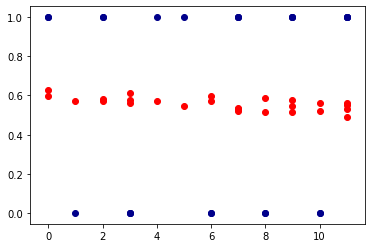

In [508]:
X_train = train.filter(items=["Octave", "Relative Midi"])
y_train = train.filter(items=["C"])

linear = sklearn.linear_model.LinearRegression()

linear.fit(X_train, y_train)

X_test = test.filter(items=["Octave", "Relative Midi"])
y_test = test.filter(items=["C"])

print("Training score: %d%%" % (100 * linear.score(X_train, y_train)))
print("Testing score: %d%%" % (100 * linear.score(X_test, y_test)))

y_test_predicted = linear.predict(X_test)
plt.scatter(X_test["Relative Midi"], y_test_predicted, color='Red')
plt.scatter(X_test["Relative Midi"], y_test, color="DarkBlue")

output = test.copy()
output["Linear prediction (C major)"] = linear.predict(X_test)
output.sample(n=5)

### Logistic regression

Training accuracy: 57%
Testing accuracy: 57%


,Midi,A,B,C,D,Relative Midi,Octave,Logistic prediction (C major)
46,46,0,1,0,0,10,3,1
107,107,1,1,1,1,11,8,1
40,40,1,1,1,1,4,3,1
72,72,0,0,1,0,0,6,1
31,31,0,0,1,1,7,2,1


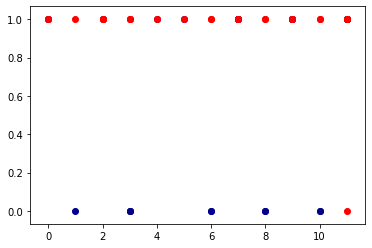

In [513]:
logistic = sklearn.linear_model.LogisticRegression(solver = 'lbfgs')
logistic.fit(X_train, y_train.values.ravel())

print("Training accuracy: %i%%" % (100 * logistic.score(X_train, y_train)))
print("Testing accuracy: %i%%" % (100 * logistic.score(X_test, y_test)))

y_test_predicted = logistic.predict(X_test)
plt.scatter(X_test["Relative Midi"], y_test, color="DarkBlue")
plt.scatter(X_test["Relative Midi"], y_test_predicted, color='Red')

output = test.copy()
output["Logistic prediction (C major)"] = logistic.predict(X_test)
output.sample(n=5)

### Stochastic descent

Training accuracy: 54%
Testing accuracy: 57%


,Midi,A,B,C,D,Relative Midi,Octave,Stochastic descent prediction (C major)
106,106,0,1,0,0,10,8,1
8,8,1,1,0,0,8,0,1
119,119,1,1,1,1,11,9,1
14,14,1,0,1,1,2,1,1
40,40,1,1,1,1,4,3,1


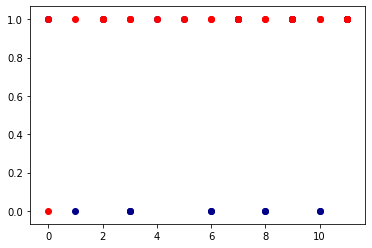

In [512]:
stochastic = sklearn.linear_model.SGDClassifier()
stochastic.fit(X_train, y_train.values.ravel())

print("Training accuracy: %i%%" % (100 * stochastic.score(X_train, y_train)))
print("Testing accuracy: %i%%" % (100 * stochastic.score(X_test, y_test)))

y_test_predicted = stochastic.predict(X_test)
plt.scatter(X_test["Relative Midi"], y_test, color="DarkBlue")
plt.scatter(X_test["Relative Midi"], y_test_predicted, color='Red')

output = test.copy()
output["Stochastic descent prediction (C major)"] = stochastic.predict(X_test)
output.sample(n=5)

### Confusion matrix

In [382]:
pandas.DataFrame(sklearn.metrics.confusion_matrix(y_test, y_test_predicted))

,0,1
0,0,10
1,2,14


### K neighbours

In [383]:
from sklearn.neighbors import KNeighborsClassifier

y_train = train.filter(items=["A", "B", "C", "D"])
y_test = test.filter(items=["A", "B", "C", "D"])

neighbours = sklearn.neighbors.KNeighborsClassifier()
neighbours.fit(X_train, y_train)

print("Training accuracy: %i%%" % (100 * neighbours.score(X_train, y_train)))
print("Testing accuracy: %i%%" % (100 * neighbours.score(X_test, y_test)))

y_predicted = pandas.DataFrame(neighbours.predict(X_test))
output = test.copy()
output["Predicted A"] = y_predicted.iloc[:,0].values
output["Predicted B"] = y_predicted.iloc[:,1].values
output["Predicted C"] = y_predicted.iloc[:,2].values
output["Predicted D"] = y_predicted.iloc[:,3].values
output.sample(n=5)

Training accuracy: 60%
Testing accuracy: 19%


,Midi,A,B,C,D,Relative Midi,Octave,Predicted A,Predicted B,Predicted C,Predicted D
15,15,0,1,0,0,3,1,1,1,1,1
31,31,0,0,1,1,7,2,1,1,0,1
117,117,1,0,1,1,9,9,1,0,1,1
11,11,1,1,1,1,11,0,1,1,1,1
69,69,1,0,1,1,9,5,1,1,0,0


### Polynomial regression

Training score: 90%
Testing score: 92%


,Midi,A,B,C,D,Relative Midi,Octave,Polynomial prediction (C major)
19,19,0,0,1,1,7,1,1.039504
102,102,1,1,0,1,6,8,-0.080390
117,117,1,0,1,1,9,9,1.003951
24,24,0,0,1,0,0,2,0.866452
71,71,1,1,1,1,11,5,0.998571


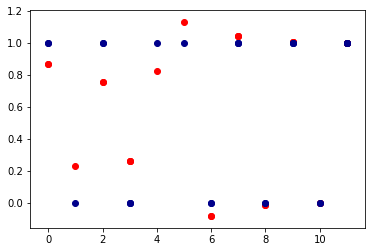

In [515]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

polynomial = sklearn.preprocessing.PolynomialFeatures(degree=13)
X_poly_train = polynomial.fit_transform(X_train.filter(items=["Relative Midi"]))

y_train = train.filter(items=["C"])
y_test = test.filter(items=["C"])

linear = sklearn.linear_model.Ridge(0.5)
linear.fit(X_poly_train, y_train)

X_test = test.filter(items=["Relative Midi"])
X_poly_test = polynomial.fit_transform(X_test)
y_test = test.filter(items=["C"])

print("Training score: %d%%" % (100 * linear.score(X_poly_train, y_train)))
print("Testing score: %d%%" % (100 * linear.score(X_poly_test, y_test)))

y_test_predicted = linear.predict(X_poly_test)
plt.scatter(X_test["Relative Midi"], y_test_predicted, color='Red')
plt.scatter(X_test["Relative Midi"], y_test, color="DarkBlue")

output = test.copy()
output["Polynomial prediction (C major)"] = linear.predict(X_poly_test)
output.sample(n=5)

### With rounding

In [531]:
y_test_rounded = round(output["Polynomial prediction (C major)"])

linear = sklearn.linear_model.LinearRegression()
linear.fit(pandas.DataFrame(y_test_rounded), y_test)

print("Rounded testing score: %d%%" % (100 * linear.score(pandas.DataFrame(y_test_rounded), y_test)))

output["Rounded polynomial prediction (C major)"] = y_test_rounded
output.sample(n=5)

Rounded testing score: 100%


,Midi,A,B,C,D,Relative Midi,Octave,Polynomial prediction (C major),Rounded polynomial prediction (C major)
102,102,1,1,0,1,6,8,-0.080390,-0.0
119,119,1,1,1,1,11,9,0.998571,1.0
40,40,1,1,1,1,4,3,0.823746,1.0
116,116,1,1,0,0,8,9,-0.013454,-0.0
1,1,1,1,0,1,1,0,0.230462,0.0
